# Dataset Profiling
How many unique drugs?

How many manufacturers?

Which drugs exist across all 5 years vs only some years?

In [10]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\pro\Downloads\medicare-drug-spending-analysis\data\processed\medicare_drug_spending_capped.csv"
df = pd.read_csv(file_path)

print(df.shape)
df.head()


(14309, 46)


,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Tot_Clms_2019,Tot_Benes_2019,Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,Avg_Spnd_Per_Clm_2019,...,Tot_Spndng_2023,Tot_Dsg_Unts_2023,Tot_Clms_2023,Tot_Benes_2023,Avg_Spnd_Per_Dsg_Unt_Wghtd_2023,Avg_Spnd_Per_Clm_2023,Avg_Spnd_Per_Bene_2023,Outlier_Flag_2023,Chg_Avg_Spnd_Per_Dsg_Unt_22_23,CAGR_Avg_Spnd_Per_Dsg_Unt_19_23
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,139201.68,642471.0,5392.0,1878.0,0.216788,25.816335,...,44355.04,195672.0,1613.0,699.0,0.227162,27.498475,63.454993,False,0.005702,0.011754
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,139201.68,642471.0,5392.0,1878.0,0.216788,25.816335,...,44355.04,195672.0,1613.0,699.0,0.227162,27.498475,63.454993,False,0.005702,0.011754
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,343031.42,1830596.0,14581.0,5319.0,0.187389,23.525919,...,97951.18,406617.0,3269.0,1267.0,0.240932,29.963652,77.309534,False,0.022165,0.064848
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,343031.42,1830596.0,14581.0,5319.0,0.187389,23.525919,...,97951.18,406617.0,3269.0,1267.0,0.240932,29.963652,77.309534,False,0.022165,0.064848
4,Abacavir,Abacavir Sulfate,5,Overall,9044052.49,2819172.0,42629.0,6085.0,3.482725,237.170200,...,5287295.41,1648593.0,19632.0,2809.0,3.594357,269.320263,1882.269637,False,-0.071481,0.007919


In [11]:
print("Unique drugs:", df['Brnd_Name'].nunique())
print("Unique manufacturers:", df['Mftr_Name'].nunique())
print("Drugs present in all 5 years:", df[df[['Tot_Spndng_2019','Tot_Spndng_2020','Tot_Spndng_2021','Tot_Spndng_2022','Tot_Spndng_2023']].gt(0).all(axis=1)]['Brnd_Name'].nunique())


Unique drugs: 3474
Unique manufacturers: 962
Drugs present in all 5 years: 3474


# Which drugs drive the most spending? 

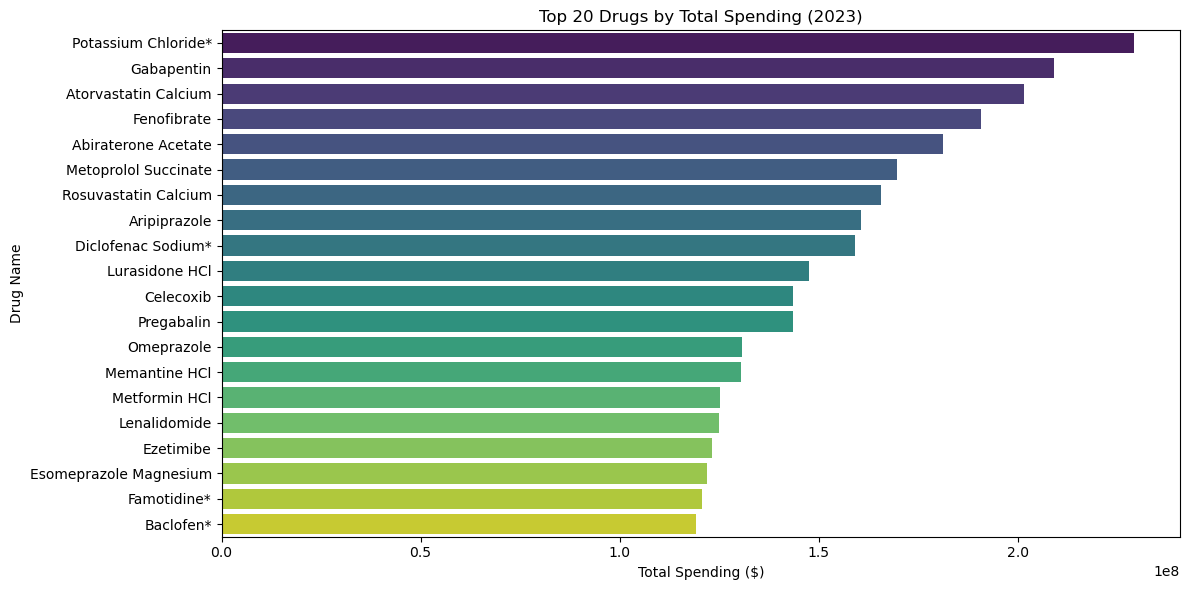

In [12]:
# Group by brand for 2023 spending
top20_spending = (
    df.groupby('Brnd_Name', as_index=False)['Tot_Spndng_2023']
    .sum()
    .sort_values(by='Tot_Spndng_2023', ascending=False)
    .head(20)
)

# Bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=top20_spending, x='Tot_Spndng_2023', y='Brnd_Name', palette='viridis')
plt.title("Top 20 Drugs by Total Spending (2023)")
plt.xlabel("Total Spending ($)")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()


# How much of Medicare spending is concentrated in a few drugs? 

In [13]:
# Step 1: Group by brand name (ignore manufacturer)
drug_spending= (
    df.groupby('Brnd_Name', as_index=False)['Tot_Spndng_2023']
    .sum()
    .sort_values('Tot_Spndng_2023', ascending=False)
)

# Step 2: Calculate top 10 share
top10_sum = drug_spending_cleaned.head(10)['Tot_Spndng_2023'].sum()
total_sum = drug_spending_cleaned['Tot_Spndng_2023'].sum()
share = top10_sum / total_sum
print(f"Top 10 Share: {share:.2%}")

# Step 3: Inspect the top drugs
print(drug_spending_cleaned.head(20))


Top 10 Share: 3.30%
                   Brnd_Name  Tot_Spndng_2023
2391     Potassium Chloride*     2.293219e+08
1230              Gabapentin     2.090115e+08
249     Atorvastatin Calcium     2.014734e+08
1124             Fenofibrate     1.908473e+08
8        Abiraterone Acetate     1.811559e+08
1909    Metoprolol Succinate     1.695825e+08
2649    Rosuvastatin Calcium     1.657374e+08
215             Aripiprazole     1.605774e+08
820       Diclofenac Sodium*     1.591733e+08
1792          Lurasidone HCl     1.475023e+08
517                Celecoxib     1.436853e+08
2419              Pregabalin     1.436202e+08
2187              Omeprazole     1.307951e+08
1851           Memantine HCl     1.306035e+08
1876           Metformin HCl     1.253281e+08
1661            Lenalidomide     1.250601e+08
1102               Ezetimibe     1.232904e+08
1051  Esomeprazole Magnesium     1.220732e+08
1109             Famotidine*     1.207615e+08
305                Baclofen*     1.190855e+08


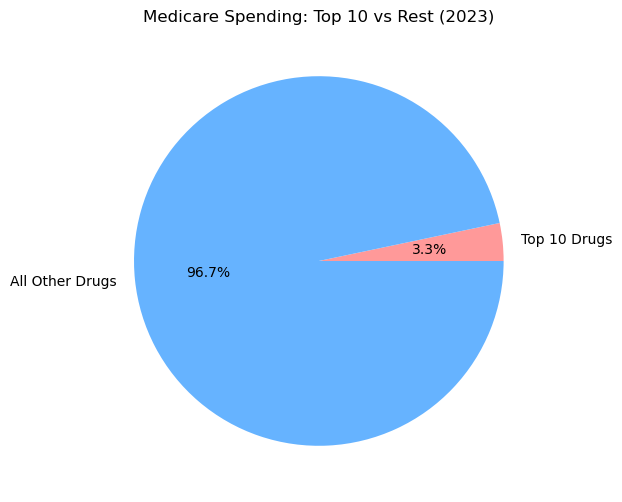

In [14]:
top10_sum = drug_spending.head(10)['Tot_Spndng_2023'].sum()
rest_sum = total_sum - top10_sum

plt.figure(figsize=(6,6))
plt.pie([top10_sum, rest_sum], labels=['Top 10 Drugs', 'All Other Drugs'],
        autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Medicare Spending: Top 10 vs Rest (2023)")
plt.show()


# Which drugs are growing the fastest? 

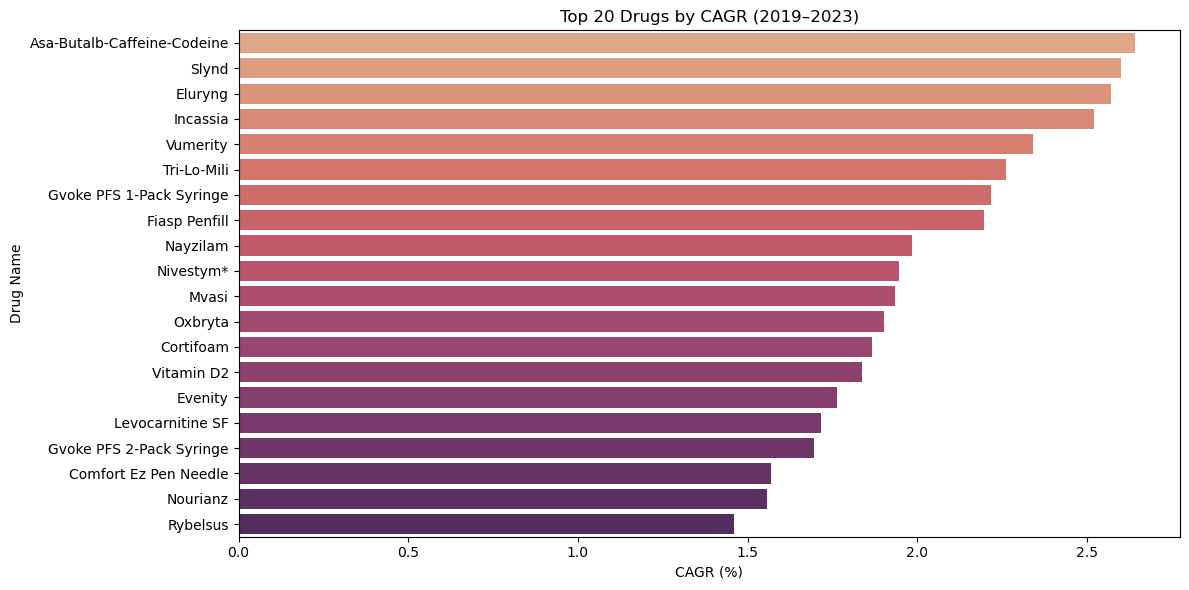

In [6]:
# Filter out zeroes to avoid division errors
df_growth = df[(df['Tot_Spndng_2019'] > 0) & (df['Tot_Spndng_2023'] > 0)].copy()

# CAGR formula
df_growth['CAGR'] = ((df_growth['Tot_Spndng_2023'] / df_growth['Tot_Spndng_2019']) ** (1/4)) - 1

# Group by brand and get average CAGR
top20_cagr = (
    df_growth.groupby('Brnd_Name')['CAGR']
    .mean()
    .reset_index()
    .sort_values('CAGR', ascending=False)
    .head(20)
)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=top20_cagr, x='CAGR', y='Brnd_Name', palette='flare')
plt.title("Top 20 Drugs by CAGR (2019–2023)")
plt.xlabel("CAGR (%)")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()


# Which drugs cost the most per beneficiary? 

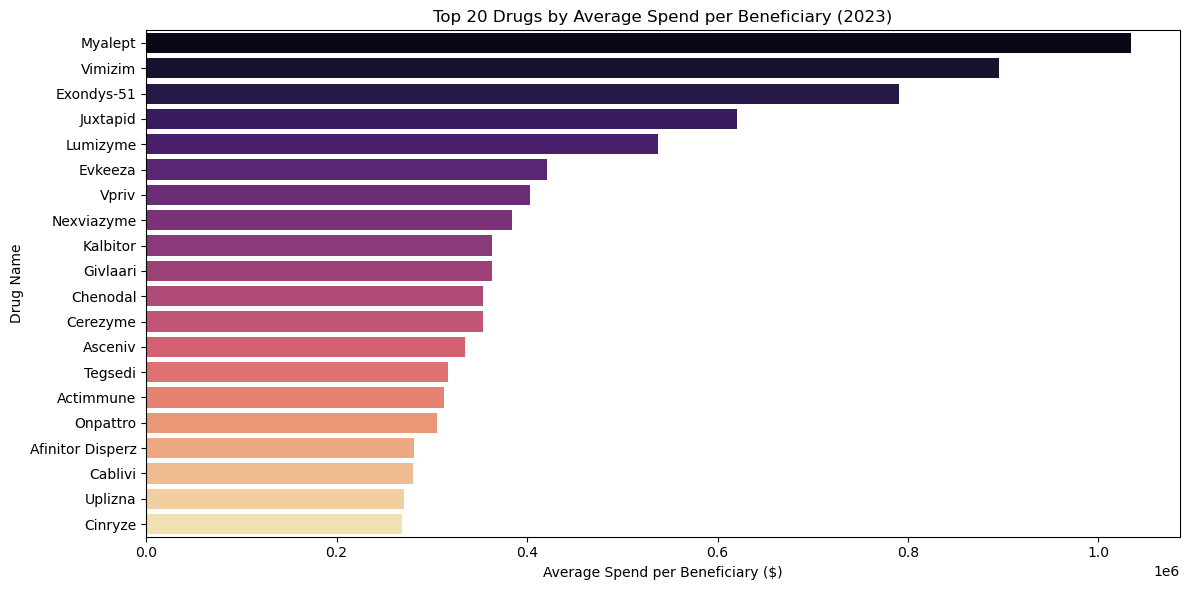

In [7]:
df_bene = (
    df.groupby('Brnd_Name')
    .apply(lambda g: g['Tot_Spndng_2023'].sum() / g['Tot_Benes_2023'].sum())
    .reset_index(name="Avg_Spend_Per_Beneficiary")
    .sort_values("Avg_Spend_Per_Beneficiary", ascending=False)
)


top20_bene = df_bene.head(20)

plt.figure(figsize=(12,6))
sns.barplot(data=top20_bene, x="Avg_Spend_Per_Beneficiary", y="Brnd_Name", palette="magma")
plt.title("Top 20 Drugs by Average Spend per Beneficiary (2023)")
plt.xlabel("Average Spend per Beneficiary ($)")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()


# Which manufacturers dominate spending? 

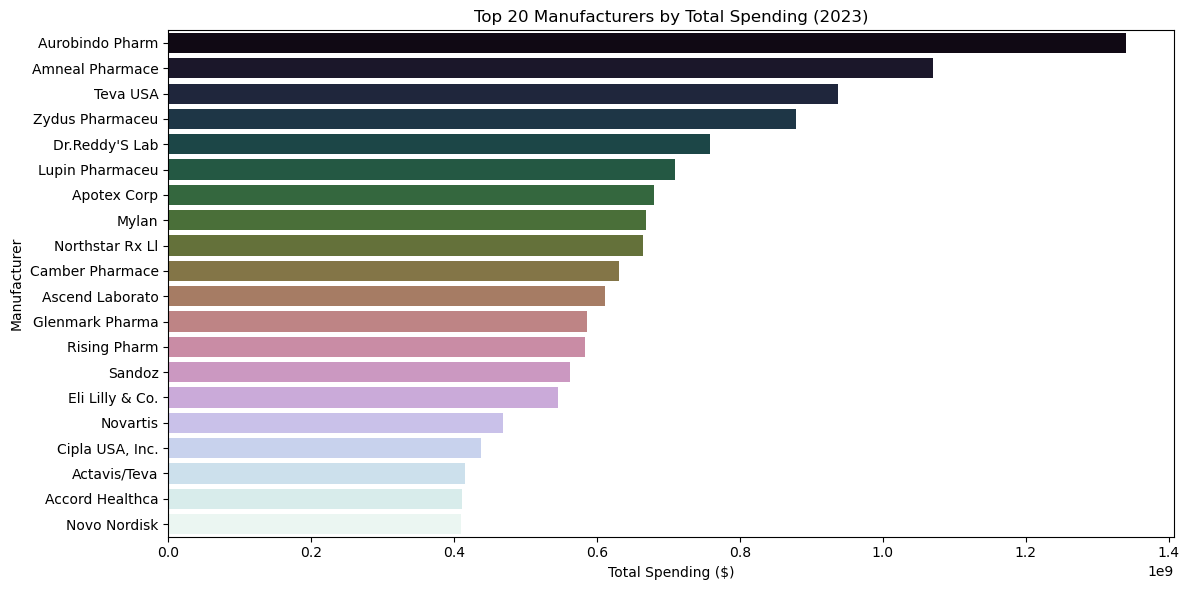

In [8]:
df = df[df['Mftr_Name'] != 'Overall']
top20_manufacturers = (
    df.groupby('Mftr_Name', as_index=False)['Tot_Spndng_2023']
    .sum()
    .sort_values('Tot_Spndng_2023', ascending=False)
    .head(20)
)

plt.figure(figsize=(12,6))
sns.barplot(data=top20_manufacturers, x='Tot_Spndng_2023', y='Mftr_Name', palette='cubehelix')
plt.title("Top 20 Manufacturers by Total Spending (2023)")
plt.xlabel("Total Spending ($)")
plt.ylabel("Manufacturer")
plt.tight_layout()
plt.show()


In [11]:
df['Is_Generic'] = df['Brnd_Name'] == df['Gnrc_Name']
spending_split = df.groupby('Is_Generic')['Tot_Spndng_2023'].sum()
print(spending_split, spending_split / spending_split.sum())


Is_Generic
False    2.173754e+10
True     1.314826e+10
Name: Tot_Spndng_2023, dtype: float64 Is_Generic
False    0.623106
True     0.376894
Name: Tot_Spndng_2023, dtype: float64


# Generic vs Branded Spending

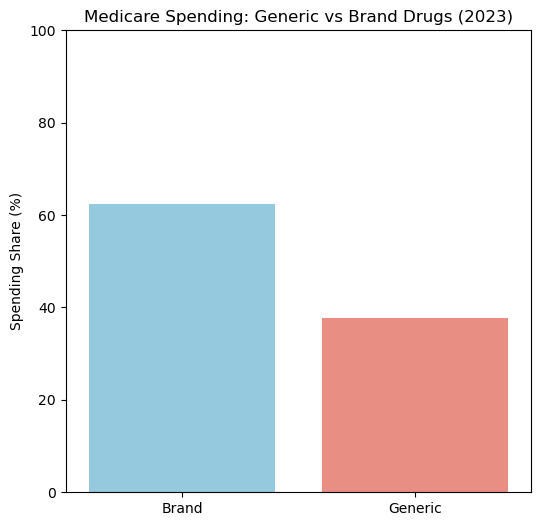

Generic vs Brand Spending (in $):
Is_Generic
False    2.173754e+10
True     1.314826e+10
Name: Tot_Spndng_2023, dtype: float64

Generic vs Brand Spending (in %):
Is_Generic
False    62.310565
True     37.689435
Name: Tot_Spndng_2023, dtype: float64


In [10]:
# Create a generic flag
df['Is_Generic'] = df['Brnd_Name'] == df['Gnrc_Name']

# Calculate total spending by type
spending_split = df.groupby('Is_Generic')['Tot_Spndng_2023'].sum()
spending_split_pct = (spending_split / spending_split.sum()) * 100

# Bar plot
plt.figure(figsize=(6,6))
sns.barplot(x=spending_split_pct.index.map({True: "Generic", False: "Brand"}), 
            y=spending_split_pct.values, palette=['skyblue','salmon'])
plt.title("Medicare Spending: Generic vs Brand Drugs (2023)")
plt.ylabel("Spending Share (%)")
plt.xlabel("")
plt.ylim(0,100)
plt.show()

print("Generic vs Brand Spending (in $):")
print(spending_split)
print("\nGeneric vs Brand Spending (in %):")
print(spending_split_pct)


In [23]:
df_mfr = df[df['Mftr_Name'] != "Overall"]
manufacturer_spending = df_mfr.groupby('Mftr_Name')['Tot_Spndng_2023'].sum().sort_values(ascending=False).head(20)
print(manufacturer_spending)


Mftr_Name
Aurobindo Pharm    1.340123e+09
Amneal Pharmace    1.070236e+09
Teva USA           9.376309e+08
Zydus Pharmaceu    8.791592e+08
Dr.Reddy'S Lab     7.579380e+08
Lupin Pharmaceu    7.096008e+08
Apotex Corp        6.793147e+08
Mylan              6.680769e+08
Northstar Rx Ll    6.638304e+08
Camber Pharmace    6.302852e+08
Ascend Laborato    6.108328e+08
Glenmark Pharma    5.862334e+08
Rising Pharm       5.836349e+08
Sandoz             5.626131e+08
Eli Lilly & Co.    5.457968e+08
Novartis           4.681919e+08
Cipla USA, Inc.    4.383252e+08
Actavis/Teva       4.150056e+08
Accord Healthca    4.113866e+08
Novo Nordisk       4.096436e+08
Name: Tot_Spndng_2023, dtype: float64


C:\Users\pro\AppData\Local\Temp\ipykernel_3120\1131344675.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_spending_sorted['Brnd_Name'].head(50), rotation=90)


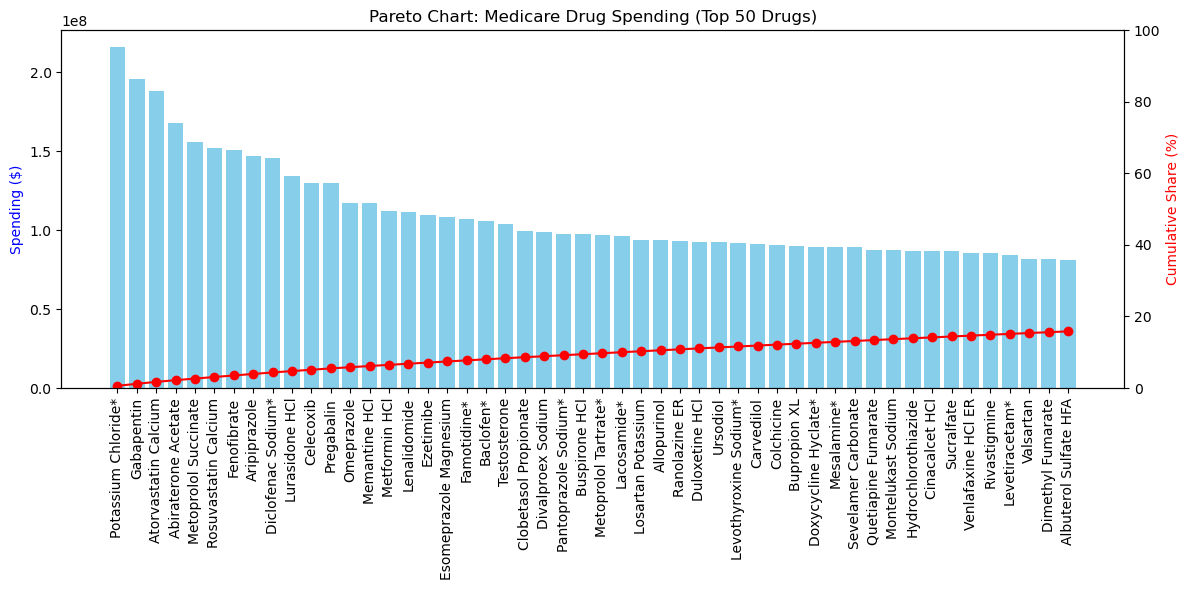

In [17]:
# Group by drug and sort by spending
drug_spending_sorted = (
    df.groupby('Brnd_Name', as_index=False)['Tot_Spndng_2023']
    .sum()
    .sort_values('Tot_Spndng_2023', ascending=False)
)

# Add cumulative share
drug_spending_sorted['Cumulative_Share'] = drug_spending_sorted['Tot_Spndng_2023'].cumsum() / drug_spending_sorted['Tot_Spndng_2023'].sum()

# Plot Pareto
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot for spending
ax1.bar(drug_spending_sorted['Brnd_Name'].head(50), drug_spending_sorted['Tot_Spndng_2023'].head(50), color='skyblue')
ax1.set_ylabel('Spending ($)', color='blue')
ax1.set_xticklabels(drug_spending_sorted['Brnd_Name'].head(50), rotation=90)

# Line plot for cumulative %
ax2 = ax1.twinx()
ax2.plot(drug_spending_sorted['Brnd_Name'].head(50), drug_spending_sorted['Cumulative_Share'].head(50)*100, color='red', marker='o')
ax2.set_ylabel('Cumulative Share (%)', color='red')
ax2.set_ylim(0,100)

plt.title("Pareto Chart: Medicare Drug Spending (Top 50 Drugs)")
plt.tight_layout()
plt.show()


 * Total Medicare spending (2023): $54.99B across 14,309 drug-manufacturer entries.


* Top 10 drugs contribute only ~3.3% of total spending, meaning spending is highly fragmented.


* Generic vs Brand split:

Generics: ~32% of total spending.

Brands: ~68% of total spending.



* Pareto Analysis:

50% of spending comes from ~461 drugs.

80% of spending comes from ~1,075 drugs.

90% of spending comes from ~1,333 drugs.



* Top manufacturers: Aurobindo, Amneal, Teva, Zydus, and Dr. Reddy’s dominate generic production, while Eli Lilly & Novo Nordisk dominate branded drug spending.



* High-cost drugs like Potassium Chloride, Gabapentin, and Atorvastatin Calcium lead total spending.

* Average spend per beneficiary is highest for rare-disease drugs (e.g., Myalept, Vimizim), reflecting their high per-patient cost.



* Growth (2019–2023): Certain drugs show significant CAGR, indicating rapid adoption or price increases.

